In [1]:
import numpy as np
import pandas as pd

#tools to help with JSON
import json
from pandas.io.json import json_normalize
#pprint - pretty print - preserves formatting
from pprint import pprint

#urllib / requests - used commonly for apis
import requests
import urllib2


# APIs
- https://www.yelp.com/developers/documentation
- http://www.reddit.com/dev/api
- http://www.publicapis.com
- https://apps.twitter.com (OAUTH nightmares)
- http://developer.rottentomatoes.com/docs
- http://developer.nytimes.com/

### Wikipedia 

- https://en.wikipedia.org/w/api.php?action=help&modules=main (API documentation)
- https://en.wikipedia.org/w/api.php?action=help&modules=query (more documentation)
- https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bextracts (Returns plain-text or limited HTML extracts of the given pages)

#Example: NY Times contributions example

## Using a web api
- Everything after the '?' is called the query string, '&' denotes variables
- API-Key is provided by the api owner and should not be shared (typically)

http://api.nytimes.com/svc/elections/us/v3/finances/2012/contributions/candidate/P80003338.json?api-key=a135ff57e67e72c98171ea7a99d92d5b%3A8%3A72904630"

### API Call

### Let's build our call
NY Times api has a handy query builder that can help us get started using their api. 
http://developer.nytimes.com/io-docs


In [5]:
api_call = "http://api.nytimes.com/svc/search/v2/articlesearch.json?q=%22F-22%22&"\
                       "begin_date=19900101&end_date=19981231&sort=oldest&api-"\
                       "key=52576efae1e6ae68fa52aa793d823f24%3A13%3A60973557"
website = requests.get(api_call)
website.headers

{'Content-Length': '17291', 'X-Powered-By': 'PHP/5.3.27', 'Vary': 'Accept-Encoding', 'Server': 'nginx/1.4.1', 'Access-Control-Allow-Credentials': 'true', 'Date': 'Tue, 22 Mar 2016 23:05:00 GMT', 'X-Mashery-Responder': 'prod-j-worker-atl-01.mashery.com', 'X-Cached': 'MISS', 'Content-Type': 'application/json; charset=UTF-8', 'Access-Control-Allow-Origin': '*'}

Info on website status can be found here: http://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html

## JSON

- javascript object notation
- comporable to xml
- structured information

In [228]:
website.json()

TypeError: unhashable type

### Using the urllib2 to convert to a dataframe

#### There are other ways that can bring these things to a dataframe. But we use URLLIB

In [28]:
request=urllib2.Request(api_call)
response = urllib2.urlopen(request)
elevations = response.read()
data1 = json.loads(elevations)
print type(data1)
data= data1['response']
print data

<type 'dict'>
{u'docs': [{u'type_of_material': u'News', u'blog': [], u'news_desk': None, u'lead_paragraph': u'A friend recently returned from a photography safari in Africa and last week brought out her album to show me the color pictures she and her husband had taken. Zebras, lions, elephants, rhinoceroses -- I was amazed at the number and variety of wild species that had willingly sat still for their portraits. Having grown up on National Geographic pictures of wildlife, I always thought that capturing fleet and dangerous denizens of jungle and savannah was a task to which only intrepid professionals were equal. The National Geographic helped make it seem that way by recounting the difficult months it took for the photographers to bring home the bacon.', u'headline': {u'main': u'Camera'}, u'abstract': None, u'print_page': u'79', u'word_count': 815, u'_id': u'4fd1a5148eb7c8105d6bd812', u'snippet': u'A friend recently returned from a photography safari in Africa and last week brought o

In [15]:
pres_df = json_normalize(data['docs'])
pres_df.head()
pres_df.describe

<bound method DataFrame.describe of                         _id abstract blog  byline  \
0  4fd1a5148eb7c8105d6bd812     None   []     NaN   
1  4fd1a9188eb7c8105d6c5763     None   []     NaN   
2  4fd1a82f8eb7c8105d6c38fa     None   []     NaN   
3  4fd1c9dc8eb7c8105d6fd803     None   []     NaN   
4  4fd1a91c8eb7c8105d6c5aba     None   []     NaN   
5  4fd198cb8eb7c8105d6a870a     None   []     NaN   
6  4fd1c9e28eb7c8105d6fdc75     None   []     NaN   
7  4fd19c048eb7c8105d6ad3a3     None   []     NaN   
8  4fd1c19b8eb7c8105d6f0f82     None   []     NaN   
9  4fd1a3318eb7c8105d6ba69b     None   []     NaN   

                 byline.original  \
0              By Andy Grundberg   
1        By RICHARD W. STEVENSON   
2               By Joel Kurtzman   
3        By RICHARD W. STEVENSON   
4                            NaN   
5                            NaN   
6           By MALCOLM W. BROWNE   
7  By COL. HARRY G. SUMMERS JR.;   
8                            NaN   
9                   

In [16]:
pres_df[['snippet', 'byline.original', 'type_of_material']]

,snippet,byline.original,type_of_material
0,A friend recently returned from a photography ...,By Andy Grundberg,News
1,Ending an intense five-year competition for wh...,By RICHARD W. STEVENSON,News
2,COMPANIES Lockheed's Side Gets a Big Boost Fro...,By Joel Kurtzman,Summary
3,"A year ago, Daniel M. Tellep, the chairman and...",By RICHARD W. STEVENSON,News
4,International A3-9 United Nations officials...,NaN,Summary
5,Peace dividend? The Air Force is acting as if ...,NaN,Editorial
6,THE Air Force's award last month of a huge con...,By MALCOLM W. BROWNE,News
7,"ON AUG. 2, 1990, the very day that Iraqi force...",By COL. HARRY G. SUMMERS JR.;,News
8,"To the Editor: ""Behind the Choosing of the F...",NaN,Letter
9,To the Editor: The Times has an outstanding ...,NaN,Letter


In [17]:
# We can then write to a .CSV

# Exercise: NY Times movies

In [29]:
movie_call = "http://api.nytimes.com/svc/movies/v2/reviews/search.json?"\
             "query=aviation&publication-date=2000-01-01%3B2010-12-31&"\
             "api-key=4576d4d652318480057e0157ebccc429%3A14%3A60973557"
website = requests.get(api_call)
## take a look at the headers
website.headers

{'Content-Length': '17291', 'X-Powered-By': 'PHP/5.3.27', 'Vary': 'Accept-Encoding', 'Server': 'nginx/1.4.1', 'Access-Control-Allow-Credentials': 'true', 'Date': 'Tue, 22 Mar 2016 23:05:00 GMT', 'X-Mashery-Responder': 'prod-j-worker-atl-03.mashery.com', 'X-Cached': 'MISS', 'Content-Type': 'application/json; charset=UTF-8', 'Access-Control-Allow-Origin': '*'}

In [55]:
## rerun the api request with urllib2 andtransform the data to pandas dataframe 
request=urllib2.Request(movie_call)
response = urllib2.urlopen(request)
elevations = response.read()
data = json.loads(elevations)
movies = json_normalize(data["results"])
movies.columns

Index([                    u'byline',             u'capsule_review',
                     u'critics_pick',               u'date_updated',
                    u'display_title',           u'dvd_release_date',
                         u'headline',   u'link.suggested_link_text',
                        u'link.type',                   u'link.url',
                      u'mpaa_rating', u'multimedia.resource.height',
          u'multimedia.resource.src',   u'multimedia.resource.type',
        u'multimedia.resource.width',               u'nyt_movie_id',
                     u'opening_date',           u'publication_date',
                     u'related_urls',                   u'seo_name',
                        u'sort_name',              u'summary_short',
                    u'thousand_best'],
      dtype='object')

In [148]:
## print a data frame with just the title, movie id and critics pick status
movies_df = movies[["display_title","headline","nyt_movie_id","critics_pick",'summary_short']]
movies_df

,display_title,headline,nyt_movie_id,critics_pick,summary_short
0,The Girl Who Played with Fire,"Even in the Rising Heat, She Stays Pretty Cool",454107,0,Noomi Rapace brings an intense rightness to th...
1,The Girl Who Kicked the Hornet's Nest,"In Trilogy’s Finale, Tough Girl Rages Against ...",457606,0,&ldquo;The Girl Who Kicked the Hornet&rsquo;s ...
2,Agora,Love Amid the Togas and the Intolerant,453107,1,"“Agora” is a rousing, toga drama from the Chil..."
3,The Life Before Her Eyes,"Robbed of Youth, and Saddled With Guilt",352387,0,“The Life Before Her Eyes” plays an irritating...
4,Body of Lies,"Big Stars Wielding an Array of Accents, Fighti...",393933,0,"Ridley Scott’s new movie, “Body of Lies,” rais..."
5,The Nativity Story,The Virgin Mary as a Teenager With Worries,347448,0,"Nothing earth-shaking, but a fine performance ..."
6,Don't Tell,One Woman's Happiness and Hysteria,332972,0,This rambling high-end soap opera about a woma...
7,The Legend of Zorro,Off to Save America With Cape and Mask,291163,0,"Like most sequels, this successor to ""The Mask..."
8,Proof,Solving for X: Is She Crazy or a Math Mastermind?,299131,0,A terribly serious adaptation of David Auburn'...
9,Robots,Machines That Rage Against Other Machines,289664,0,"This computer-animated film's setting, a world..."


## Bonus: 
#### Use this data to do NLP pre-processing then model it to predict critics picks based on the text in the review.

In [149]:
movies_df.to_csv("Oscars.csv",encoding='utf-8')

In [150]:
from spacy.en import English
nlp_toolkit = English()

In [156]:
nlp_work = pd.read_csv("Oscars.csv")
nlp_df = pd.DataFrame(nlp_work)
nlp_df = nlp_df.drop("Unnamed: 0",axis=1)
nlp_df["headline"] = nlp_df["headline"].fillna("")
nlp_df["summary_short"] = nlp_df["summary_short"].fillna("")

In [157]:
def award_in_title(title):
    print title
    titleU = title.decode('utf-8')
    parsed = nlp_toolkit(titleU)
    if any([word.lemma_ in ["oscar","academy","award"] for word in parsed]):
        return 1
    else:
        return 0

In [159]:
nlp_df["award_in_title"] = nlp_df["headline"].map(award_in_title)
nlp_df["award_in_sum"] = nlp_df["summary_short"].map(award_in_title)
nlp_df.describe()

Even in the Rising Heat, She Stays Pretty Cool
In Trilogy’s Finale, Tough Girl Rages Against Villains of Society
Love Amid the Togas and the Intolerant
Robbed of Youth, and Saddled With Guilt
Big Stars Wielding an Array of Accents, Fighting the War on Terrorism
The Virgin Mary as a Teenager With Worries
One Woman's Happiness and Hysteria
Off to Save America With Cape and Mask
Solving for X: Is She Crazy or a Math Mastermind?
Machines That Rage Against Other Machines
A Time of Tangled Transition in Israel, and in a Family
Czechs So Divided That Bad News Is Rarely All Bad
A Moviemaker Seen Through the Lens of His Son
Bulking Up for Bridget, Then Diving Into a Pigsty
A Festival of Cartoons, Not Made for Children
An American in Japan, Making a Connection
Everyone's on His Case (Especially His Wife)
Food for Thought, or Why You Might Skip That Steak
A Lelouch Jet-Set Fantasy

Noomi Rapace brings an intense rightness to the role of Lisbeth Salander in “The Girl Who Played With Fire.”
&ldquo;

,nyt_movie_id,critics_pick,award_in_title,award_in_sum
count,20.000000,20.000000,20,20.000000
mean,330137.750000,0.150000,0,0.150000
std,62172.872529,0.366348,0,0.366348
min,260403.000000,0.000000,0,0.000000
25%,290788.250000,0.000000,0,0.000000
50%,305260.500000,0.000000,0,0.000000
75%,348682.750000,0.000000,0,0.000000
max,457606.000000,1.000000,0,1.000000


In [165]:
import statsmodels.api as sm
critic_logit = sm.Logit(nlp_df["critics_pick"],nlp_df[["award_in_title","award_in_sum"]])
#critic_fit = critic_logit.fit(maxiter=10)
print ("returns singular error, so lets try a random forest")

returns singular error, so lets try a random forest


#### Trying to make a random forest based off of words in the title, then will try with words from the summary

In [226]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system 

In [221]:
vectorizer = CountVectorizer(max_features=1000,ngram_range=(0,3))
summaries = nlp_df["summary_short"]
vectorizer.fit(summaries)
X = vectorizer.transform(summaries)
Y = nlp_df["critics_pick"]
classifier = tree.DecisionTreeClassifier(min_samples_split=3,max_leaf_nodes=50,max_depth=5)
classifier.fit(X,Y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=50, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [222]:
columns_names = list(vectorizer.get_feature_names())

In [223]:
def make_visual(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(classifier, out_file = dotfile, feature_names = columns_names)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
make_visual(classifier)

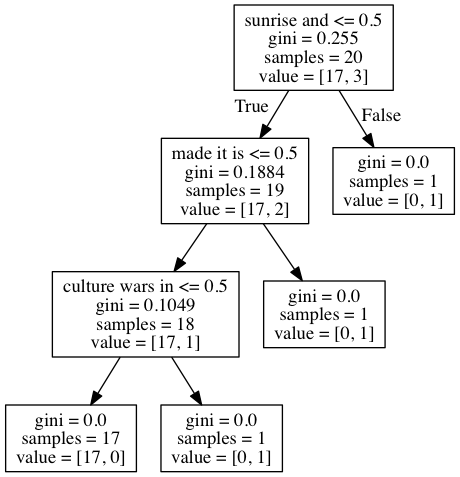

In [225]:
Image(filename='tree.png')

## Repeat this process with a new API

## Extra credit: 
There are several ways to convert to a python data frame. Find another!

## New to APIs? What to know more about RESTful APIs?
Check out this great tutorial
https://www.codecademy.com/courses/python-intermediate-en-6zbLp/3/5?curriculum_id=50ecbb00306689057a000188